
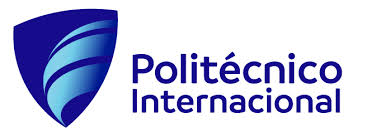

<center><h1> Analítica Aplicada a la Gestión Financiera </header1></center>
<left><h1>Actividad Núcleo 3: Modelo de abandono de usuarios bancarios</header1></left>

**Presentado por:** Gerardo Javier Forero Ortiz

**Fecha:** 28/11/2024

# **ANÁLISIS EXPLORATORIO**

**Contexto y Objetivos del Proyecto:**

Una institución bancaria realizó una campaña de marketing para determinar si un usuario se suscribiría o no a un depósito a plazo bancario (lo que en Colombia se conoce como CDT). Las campañas de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente, para poder saber si el cliente se suscribía o no a este producto financiero.  (

El objetivo es crear un modelo de clasificación para predecir si el cliente suscribirá o no al CDT (variable 'y' del dataset)


# Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías: pandas, scipy, matplotlib y scikit-learn
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
import seaborn as sns

## Cargar el Dataset

Se realiza la carga del dataset para conocer qué variables contiene y de qué formas se encuentran en la base de datos

In [2]:
# Código para cargar el Dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRrbXiHaxT0H_XVgsRn0CoOA3G13duvfw8S3y4VLKCbxL-rUMK3D2U-OlbILMem8HlpC3XqnxHz9F0J/pub?gid=549282822&single=true&output=csv"
datos = pd.read_csv(url, header=0, delimiter=',')
# Imprimimos las primeras 6 filas del DataFrame
datos.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [3]:
datos.shape

(45211, 17)

In [4]:
datos.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# Obtener el tipo de dato de cada columna
tipos_datos = datos.dtypes

print("Tipo de dato de cada columna:")
print(tipos_datos)

Tipo de dato de cada columna:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


Analizando el dataset, encontramos que tenemos una base de datos compuesta por 45.211 registros y 17 variables.

Tenemos 16 variables de entrada y una variable de salida o variable objetivo:

**Variable objetivo:**
- y: La variable objetivo para la clasificación es si el cliente se suscribe o no al CDT. Está representado por no (no abre el CDT con el banco) y yes (sí abre el CDT con el banco)

**Variables de entrada:**

1. age: edad del cliente (entero)
2. job: profesión u ocupación del cliente (categórica)
3. marital: estado civil (categórica)
4. education: nivel educativo del cliente (categórica)
5. default: créditos en impago (categórica)
6. balance: saldo en cuenta de ahorros (entero)  
7. housing: crédito de vivienda (categórica)
8. loan: crédito personal (categórica)
9. contact: tipo de comunicación (categórica)
10. day: último día de contacto del mes (entero)
11. month: mes del año del último contacto (categórica)
12. duration: duración del último contacto (entero)
13. campaign: número de contactos realizados durante esta campaña (entero)
14. pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (entero)
15. previous: número de contactos realizados antes de esta campaña y para este cliente (entero)
16. poutcome: resultado de la campaña de marketing anterior (categórica)


Lo anterior indica que, en la etapa de preprocesamiento de los datos se hará necesario codificar los datos para que sean númericos, con el fin de realizar la exploración de los datos y la creación del modelo.

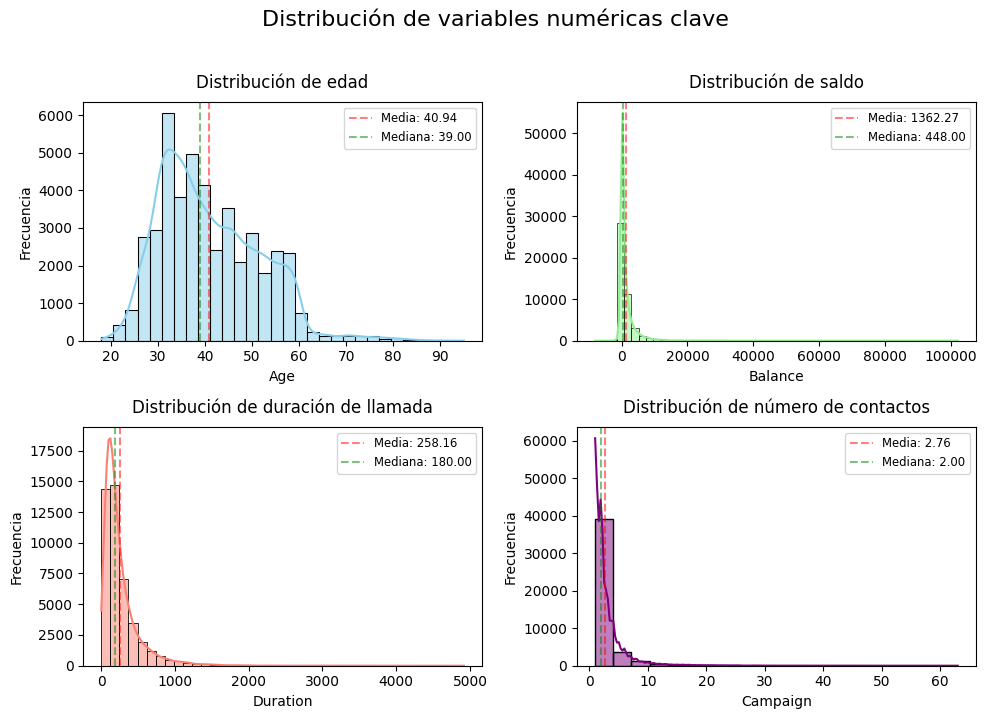

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de las gráficas
plt.style.use('default')  # Usamos el estilo default de matplotlib

# Crear una figura con subplots para los 4 histogramas
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Distribución de variables numéricas clave', fontsize=16, y=1.02)

# Lista de variables y sus configuraciones
variables = [
    {'nombre': 'age', 'titulo': 'Distribución de edad', 'color': 'skyblue', 'bins': 30},
    {'nombre': 'balance', 'titulo': 'Distribución de saldo', 'color': 'lightgreen', 'bins': 50},
    {'nombre': 'duration', 'titulo': 'Distribución de duración de llamada', 'color': 'salmon', 'bins': 40},
    {'nombre': 'campaign', 'titulo': 'Distribución de número de contactos', 'color': 'purple', 'bins': 20}
]

# Crear los histogramas
for idx, var in enumerate(variables):
    row = idx // 2
    col = idx % 2

    # Crear histograma
    sns.histplot(
        data=datos,
        x=var['nombre'],
        bins=var['bins'],
        color=var['color'],
        kde=True,
        ax=axes[row, col]
    )

    # Personalizar cada subplot
    axes[row, col].set_title(var['titulo'], pad=10)
    axes[row, col].set_xlabel(var['nombre'].capitalize())
    axes[row, col].set_ylabel('Frecuencia')

    # Añadir estadísticas descriptivas
    mean_val = datos[var['nombre']].mean()
    median_val = datos[var['nombre']].median()

    # Añadir líneas verticales para media y mediana
    axes[row, col].axvline(mean_val, color='red', linestyle='--', alpha=0.5, label=f'Media: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', alpha=0.5, label=f'Mediana: {median_val:.2f}')
    axes[row, col].legend(fontsize='small')

# Ajustar el diseño
plt.tight_layout()
plt.show()



**Distribución de Edad:**

- La edad media es de 40.94 años y la mediana de 39 años

- La distribución muestra una forma aproximadamente normal con un ligero sesgo positivo

- El rango de edad más común está entre 30-40 años

- Hay una menor frecuencia de clientes muy jóvenes (<25 años) y adultos mayores (>70 años)

Esta distribución sugiere que la campaña se enfocó en adultos en edad laboral activa.

**Distribución de Saldo (Balance):**

- Media de 1362.27 y mediana de 448 euros

- Muestra una distribución altamente sesgada a la derecha (asimetría positiva)

- La gran mayoría de los clientes tienen saldos bajos ( menos de 2000 dolares), lo que indica que pocos tienen los recursos para invertir en un CDT.

- La diferencia significativa entre media y mediana indica una gran desigualdad en los saldos

**Distribución de duración de llamada:**
- Media de 258.16 segundos y mediana de 180 segundos

- Distribución fuertemente sesgada a la derecha

- La mayoría de las llamadas son relativamente cortas (menos de 300 segundos, es decir menos de 5 minutos)

**Distribución de número de contactos (Campaign):**

- Media de 2.76 y mediana de 2 contactos
- Distribución muy concentrada en valores bajos
- La mayoría de los clientes fueron contactados menos de tres veces

La estrategia de contacto parece enfocarse en pocas interacciones por cliente

In [7]:
# Imprimir estadísticas descriptivas adicionales
print("\nEstadísticas Descriptivas:")
print("-" * 50)
for var in variables:
    nombre = var['nombre']
    stats = datos[nombre].describe()
    print(f"\nVariable: {nombre}")
    print(f"Media: {stats['mean']:.2f}")
    print(f"Mediana: {stats['50%']:.2f}")
    print(f"Desviación Estándar: {stats['std']:.2f}")
    print(f"Mínimo: {stats['min']:.2f}")
    print(f"Máximo: {stats['max']:.2f}")
    print(f"Asimetría: {datos[nombre].skew():.2f}")
    print(f"Curtosis: {datos[nombre].kurtosis():.2f}")


Estadísticas Descriptivas:
--------------------------------------------------

Variable: age
Media: 40.94
Mediana: 39.00
Desviación Estándar: 10.62
Mínimo: 18.00
Máximo: 95.00
Asimetría: 0.68
Curtosis: 0.32

Variable: balance
Media: 1362.27
Mediana: 448.00
Desviación Estándar: 3044.77
Mínimo: -8019.00
Máximo: 102127.00
Asimetría: 8.36
Curtosis: 140.75

Variable: duration
Media: 258.16
Mediana: 180.00
Desviación Estándar: 257.53
Mínimo: 0.00
Máximo: 4918.00
Asimetría: 3.14
Curtosis: 18.15

Variable: campaign
Media: 2.76
Mediana: 2.00
Desviación Estándar: 3.10
Mínimo: 1.00
Máximo: 63.00
Asimetría: 4.90
Curtosis: 39.25


## **Desbalance de clases**

In [8]:
# Número de instancias pertenecientes a cada clase
instancias_clases = datos['y'].value_counts()

print("Número de instancias pertenecientes a cada clase:")
print(instancias_clases)

Número de instancias pertenecientes a cada clase:
y
no     39922
yes     5289
Name: count, dtype: int64


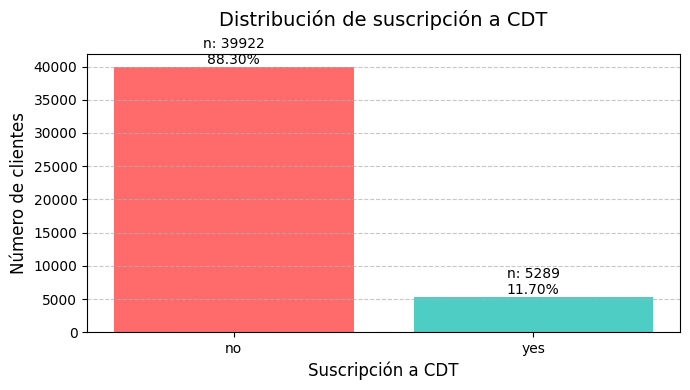


Estadísticas detalladas de la variable objetivo:
--------------------------------------------------
Total de registros: 45211

Clase 'no':
Número de instancias: 39922
Porcentaje: 88.30%

Clase 'yes':
Número de instancias: 5289
Porcentaje: 11.70%

Ratio de desbalanceo: 7.55


In [9]:
# Calcular el conteo y porcentajes
instancias_clases = datos['y'].value_counts()
porcentajes = datos['y'].value_counts(normalize=True) * 100

# Crear la figura con un tamaño específico
plt.figure(figsize=(7, 4))

# Crear el gráfico de barras
bars = plt.bar(instancias_clases.index, instancias_clases.values,
               color=['#FF6B6B', '#4ECDC4'])

# Personalizar el gráfico
plt.title('Distribución de suscripción a CDT', pad=20, fontsize=14)
plt.xlabel('Suscripción a CDT', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)

# Añadir los valores numéricos y porcentajes sobre las barras
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'n: {int(height)}\n{porcentajes.iloc[idx]:.2f}%',
             ha='center', va='bottom')

# Añadir grid para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Imprimir estadísticas detalladas
print("\nEstadísticas detalladas de la variable objetivo:")
print("-" * 50)
print(f"Total de registros: {len(datos)}")
for clase in instancias_clases.index:
    print(f"\nClase '{clase}':")
    print(f"Número de instancias: {instancias_clases[clase]}")
    print(f"Porcentaje: {porcentajes[clase]:.2f}%")

# Calcular el ratio de desbalanceo
ratio_desbalanceo = instancias_clases.max() / instancias_clases.min()
print(f"\nRatio de desbalanceo: {ratio_desbalanceo:.2f}")

Estamos ante una clasificación binaria, cuyas variables de salida son 'no' y 'yes'. El dataset tiene un importante desbalance de clases, si se tiene en cuenta que la clase 'no' tiene 39.922 registos y la clase 'yes' tiene solo '5289'  registros. **Esto indica que es necesario aplicar un balanceo de clases, porque hay un ratio de desbalanceo de 7.55, es decir hay siete veces más registros de la clase 'no' que de la clase 'yes'.**

# **PREPARACIÓN DE LOS DATOS**

# Cambio en el tipo de datos
Tal como indicamos anteriormente, las variables que se encuentran como tipo object, vamos a transformarla en tipo número, con el fin de no tener mayores inconvenientes a la hora de entrenar el modelo.


In [10]:
from sklearn.preprocessing import LabelEncoder

# Lista de variables categóricas a codificar
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                      'loan', 'contact', 'month', 'poutcome', 'y']

# Crear una copia del dataset original
df = datos.copy()

# Crear un diccionario para almacenar los encoders
encoders = {}

# Aplicar Label Encoding a cada variable categórica
for column in categorical_columns:
    encoders[column] = LabelEncoder()
    df[column] = encoders[column].fit_transform(df[column])

# Mostrar las correspondencias de codificación
print("Mapeo de codificación para cada variable:")
print("-" * 50)
for column in categorical_columns:
    print(f"\nVariable: {column}")
    mapping = dict(zip(encoders[column].classes_,
                      encoders[column].transform(encoders[column].classes_)))
    for original, encoded in mapping.items():
        print(f"{original}: {encoded}")

# Mostrar las primeras filas del dataset codificado
print("\nPrimeras filas del dataset codificado:")
print("-" * 50)
print(df.head())

# Guardar el mapeo en un archivo para referencia futura
mapping_dict = {}
for column in categorical_columns:
    mapping_dict[column] = dict(zip(encoders[column].classes_,
                                   encoders[column].transform(encoders[column].classes_)))

# Convertir el diccionario a DataFrame para mejor visualización
mapping_df = pd.DataFrame.from_dict(mapping_dict, orient='index').transpose()

# Guardar el mapeo en un archivo CSV
mapping_df.to_csv('categorical_mapping.csv')


Mapeo de codificación para cada variable:
--------------------------------------------------

Variable: job
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11

Variable: marital
divorced: 0
married: 1
single: 2

Variable: education
primary: 0
secondary: 1
tertiary: 2
unknown: 3

Variable: default
no: 0
yes: 1

Variable: housing
no: 0
yes: 1

Variable: loan
no: 0
yes: 1

Variable: contact
cellular: 0
telephone: 1
unknown: 2

Variable: month
apr: 0
aug: 1
dec: 2
feb: 3
jan: 4
jul: 5
jun: 6
mar: 7
may: 8
nov: 9
oct: 10
sep: 11

Variable: poutcome
failure: 0
other: 1
success: 2
unknown: 3

Variable: y
no: 0
yes: 1

Primeras filas del dataset codificado:
--------------------------------------------------
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2        

In [11]:
# Mostrar información estadística básica del dataset codificado
print("\nInformación estadística básica del dataset codificado:")
print("-" * 50)
print(df.describe())


Información estadística básica del dataset codificado:
--------------------------------------------------
                age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      4.339762      1.167725      1.224813      0.018027   
std       10.618762      3.272657      0.608230      0.747997      0.133049   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     1362.272058 

In [12]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


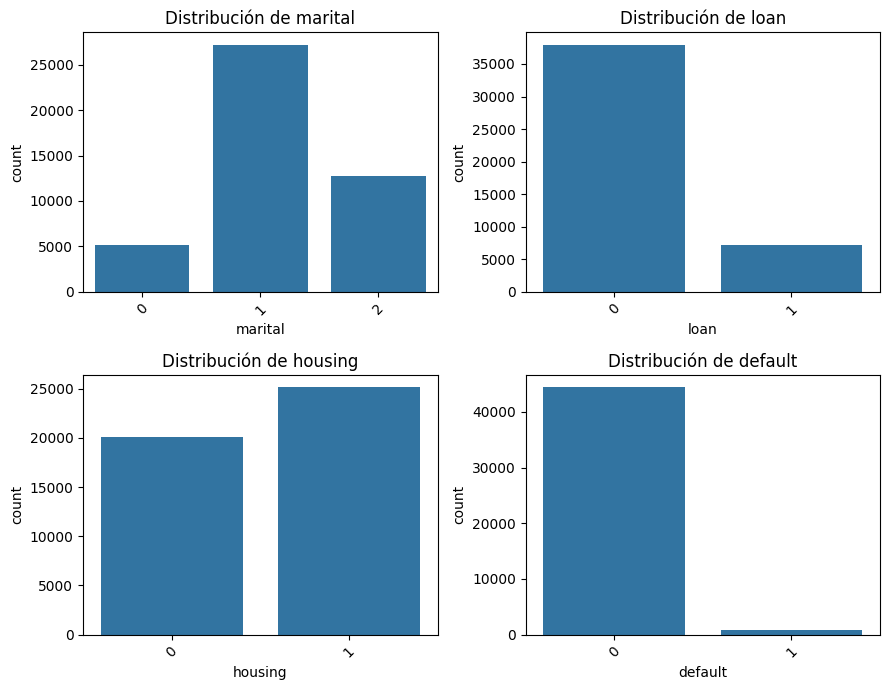

In [13]:
# Visualizar la distribución de variables
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables de interés
selected_columns = ['marital', 'loan', 'housing', 'default']

# Crear subplots para las variables seleccionadas
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.ravel()

for idx, col in enumerate(selected_columns):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Marital (Estado Civil):**

La mayoría de los clientes se encuentran casados, (aproximadamente 25,000)
seguido por la categoría de solteros (cerca de 12,000) y la categoría de divorciados es la menos común (alrededor de 5,000)

**Loan (Préstamo Personal):**

La mayoría (más de 35,000) no tienen préstamo personal (0)
Solo una minoría (cerca de 7,000) tienen préstamo personal (1)

**Housing (Préstamo Vivienda):**

Ligeramente más clientes con préstamo de vivienda (1, 25,000)
Que sin préstamo de vivienda (0, 20,000)

**Default (Impago):**

La gran mayoría (más de 40,000) no están en default (0), muy pocos casos de default (1, menos de 5,000), lo que indica que los clientes contactados no se encuentran en mayores aprietos financieros.

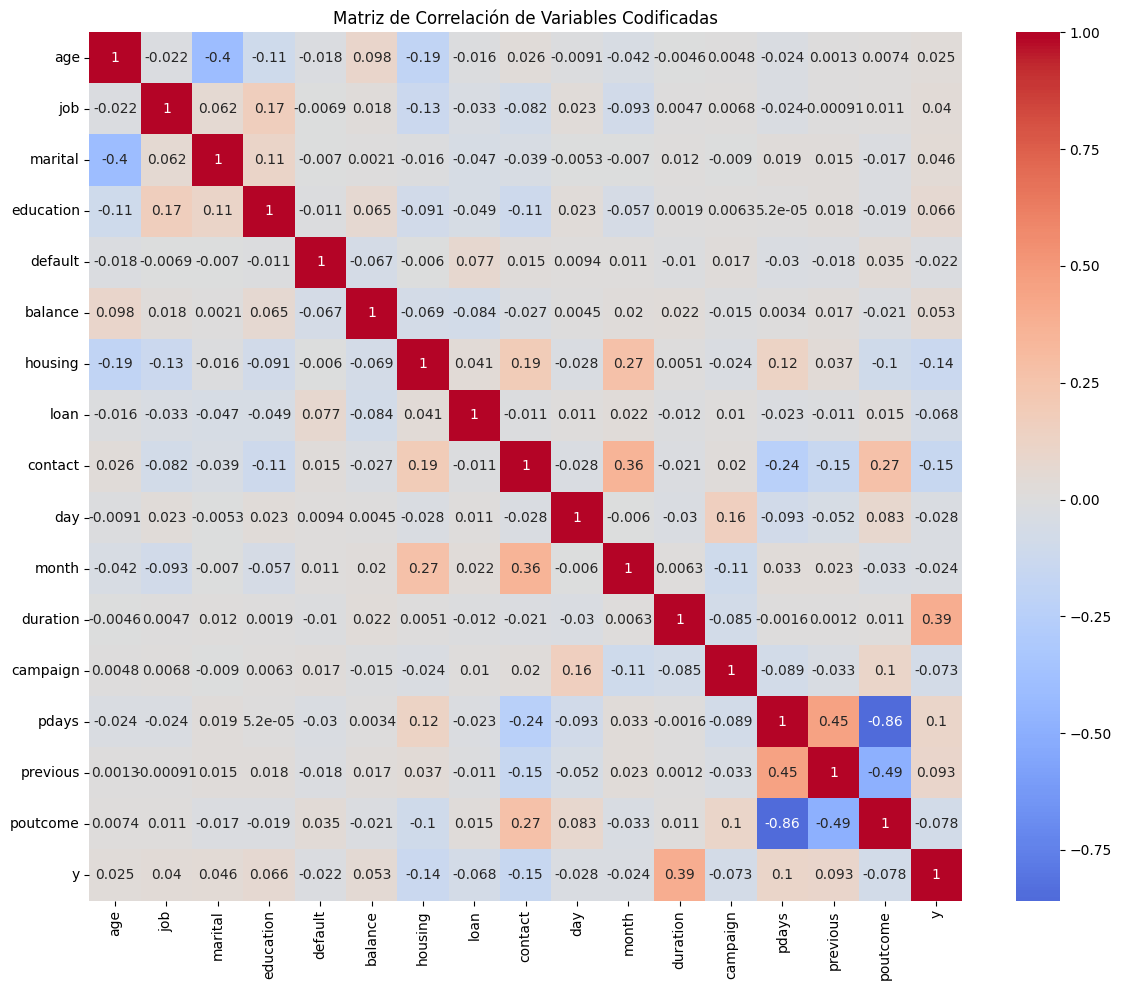

In [14]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables Codificadas')
plt.tight_layout()
plt.show()

Frente a la matriz de correlación, podemos observar lo siguiente:

**Correlaciones positivas destacadas:**

**Variables de campaña previa:**

- pdays-previous: 0.45 (relación moderada entre días desde último contacto y número de contactos)

- duration-y: 0.39 (mayor duración de llamada asociada a mayor éxito)

**Variables de contacto:**

- contact-month: 0.36 (sugiere patrones estacionales en el método de contacto)
- contact-poutcome: 0.27 (relación débil entre método de contacto y resultado previo)

**Correlaciones negativas destacadas:**

**Variables de resultado previo:**

- pdays-poutcome: -0.86 (fuerte correlación negativa)
- previous-poutcome: -0.49 (correlación moderada)

**Variables demográficas:**

- age-marital: -0.40 (sugiere relación entre edad y estado civil)
- housing-y: -0.14 (débil relación negativa entre tener préstamo vivienda y éxito)

**Observaciones generales:**

- La mayoría de correlaciones son débiles (menores a 0.3)
- Pocas variables tienen correlación fuerte con la variable objetivo (y)
- Las variables financieras (balance, default, loan) muestran correlaciones débiles entre sí
- Variables demográficas (age, job, education) tienen correlaciones bajas con otras variables

**Esto sugiere que las variables son mayormente independientes entre sí, lo que es positivo para el modelado predictivo.**

## Separación del conjunto de datos en variables de entrada (X) y variable de salida (y)

In [15]:
# Separamos los datos de entrada (X) y los de salida (y)
# 1. Primero separar X e y
X = df.drop('y', axis=1)
y = df['y']

# Mostrar las primeras filas de X
print("Variables de entrada (X):")
print(X[:5])

# Mostrar las primeras filas de y
print("\nVariable objetivo (y):")
print(y[:5])

Variables de entrada (X):
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      8       261         1     -1         0         3  
1    5      8       151         1     -1         0         3  
2    5      8        76         1     -1         0         3  
3    5      8        92         1     -1         0         3  
4    5      8       198         1     -1         0         3  

Variable objetivo (y):
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


# **Balanceo de clases:redes generativas adversarias (GAN)**

Tal como se indicó en el análisis dexploratorio,  tenemos un desbalance de clases. Hay siete veces más registros de la clase 0 que de la clase 1. Para solucionar este problema, **utilizaremos redes generativas adversarias (GAN)**, un tipo de IA generativa, para generar registros sintéticos que sean indistinguibles de los registros reales. Esto ayudará a equilibrar el conjunto de datos y a mejorar la precisión del modelo.

**Clase '0'**: no
Número de instancias: 39922
Porcentaje: 88.30%

**Clase '1'**: sí
Número de instancias: 5289
Porcentaje: 11.70%

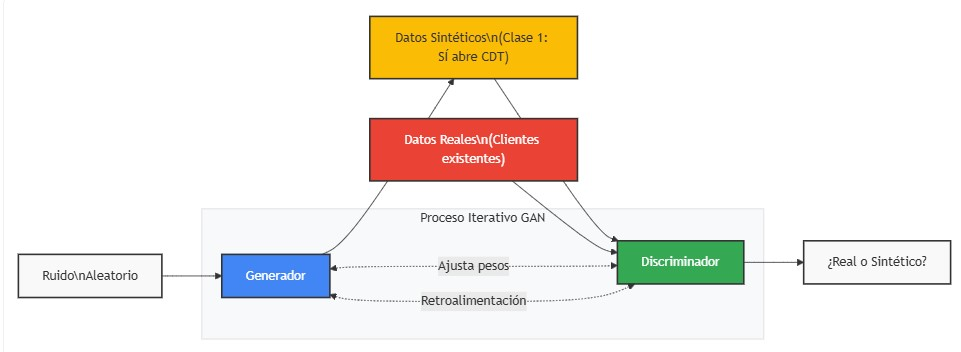

**Preparar los datos para el GAN**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Identificar los registros de la clase minoritaria
X_minority = X_scaled[y == 1]
y_minority = y[y == 1]

**Construir el generador**

In [18]:
def build_generator():
    model = Sequential([
        # Capa de entrada: 16 features
        Dense(128, activation='relu', input_dim=16, kernel_initializer='he_uniform'),
        BatchNormalization(),

        # Capas ocultas
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),

        # Capa de salida: debe coincidir con número de features
        Dense(16, activation='tanh')  # tanh para mantener valores en rango similar
    ])

    model.summary()
    return model

**Construir el discriminador**

In [19]:
def build_discriminator():
    model = Sequential([
        # Capa de entrada: 16 features
        Dense(128, input_dim=16, activation='relu', kernel_initializer='he_uniform'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        # Salida binaria: real o sintético
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    model.summary()
    return model

**Construir el GAN completo**

In [20]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(16,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(
        optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
        loss='binary_crossentropy'
    )
    gan.summary()
    return gan

**Función para generar datos sintéticos**

In [21]:
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, 16))
    synthetic_data = generator.predict(noise, verbose=0)
    return synthetic_data

**Función para monitorear el progreso**

In [22]:
def monitor_generator(generator, X_minority):
    pca = PCA(n_components=2)

    # Transformar datos reales
    transformed_real = pca.fit_transform(X_minority)
    df_real = pd.DataFrame(transformed_real)
    df_real['label'] = "real"

    # Generar y transformar datos sintéticos
    synthetic_data = generate_synthetic_data(generator, len(X_minority))
    transformed_fake = pca.transform(synthetic_data)
    df_fake = pd.DataFrame(transformed_fake)
    df_fake['label'] = "synthetic"

    # Visualizar
    df_combined = pd.concat([df_real, df_fake])
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.title('Distribución de datos reales vs sintéticos')
    plt.show()


**Entrenamiento del GAN**

In [23]:
@tf.function(reduce_retracing=True)
def train_discriminator_step(discriminator, real_samples, synthetic_samples):
    with tf.GradientTape() as tape:
        # Predicciones para muestras reales
        real_labels = tf.ones((real_samples.shape[0], 1))
        real_output = discriminator(real_samples, training=True)
        d_loss_real = tf.keras.losses.binary_crossentropy(real_labels, real_output)

        # Predicciones para muestras sintéticas
        fake_labels = tf.zeros((synthetic_samples.shape[0], 1))
        fake_output = discriminator(synthetic_samples, training=True)
        d_loss_fake = tf.keras.losses.binary_crossentropy(fake_labels, fake_output)

        # Pérdida total
        d_loss = (d_loss_real + d_loss_fake) / 2

    # Calcular gradientes y actualizar pesos
    gradients = tape.gradient(d_loss, discriminator.trainable_variables)
    discriminator.optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))
    return d_loss

@tf.function(reduce_retracing=True)
def train_generator_step(gan, batch_size):
    noise = tf.random.normal([batch_size, 16])
    valid_labels = tf.ones((batch_size, 1))

    with tf.GradientTape() as tape:
        g_loss = tf.keras.losses.binary_crossentropy(valid_labels, gan(noise, training=True))

    gradients = tape.gradient(g_loss, generator.trainable_variables)
    gan.optimizer.apply_gradients(zip(gradients, generator.trainable_variables))
    return g_loss

def train_gan(generator, discriminator, gan, X_minority, epochs=100, batch_size=32):
    # Asegurarnos que el discriminador sea entrenable
    discriminator.trainable = True

    # Calcular número de batches
    half_batch = batch_size // 2

    # Listas para almacenar el historial de pérdidas
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        try:
            # 1. Entrenar Discriminador
            idx = np.random.randint(0, X_minority.shape[0], half_batch)
            real_samples = X_minority[idx]

            # Generar muestras sintéticas
            noise = tf.random.normal([half_batch, 16])
            synthetic_samples = generator.predict(noise, verbose=0)

            # Entrenar discriminador
            d_loss = train_discriminator_step(discriminator, real_samples, synthetic_samples)

            # 2. Entrenar Generador
            g_loss = train_generator_step(gan, batch_size)

            # Convertir pérdidas a números para almacenamiento
            d_loss_value = float(tf.reduce_mean(d_loss))
            g_loss_value = float(tf.reduce_mean(g_loss))

            # Guardar historial
            d_losses.append(d_loss_value)
            g_losses.append(g_loss_value)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}")
                print(f"Discriminator Loss: {d_loss_value:.4f}")
                print(f"Generator Loss: {g_loss_value:.4f}")
                print("-" * 30)

                # Visualizar progreso
                monitor_generator(generator, X_minority)

        except Exception as e:
            print(f"Error en epoch {epoch}: {str(e)}")
            continue

    return d_losses, g_losses

**Crear y compilar los modelos**

In [24]:
generator = build_generator()
discriminator = build_discriminator()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,096 (86.31 KB)

 Trainable params: 21,456 (83.81 KB)

 Non-trainable params: 640 (2.50 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compilar el discriminador con configuración específica
discriminator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Construir y compilar el GAN
gan = build_gan(generator, discriminator)
gan.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy'
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 16)                  │          22,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │          13,057 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,153 (137.32 KB)

 Trainable params: 21,456 (83.81 KB)

 Non-trainable params: 13,697 (53.50 KB)

**Entrenar el modelo y guardar el historial**

Epoch 0
Discriminator Loss: 0.7715
Generator Loss: 0.8805
------------------------------


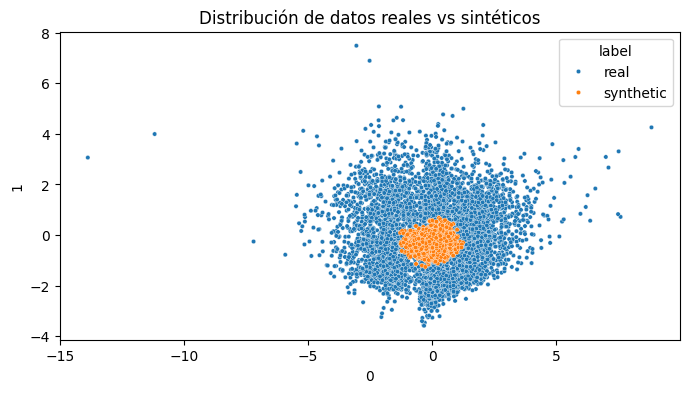

Epoch 10
Discriminator Loss: 0.7069
Generator Loss: 0.7698
------------------------------


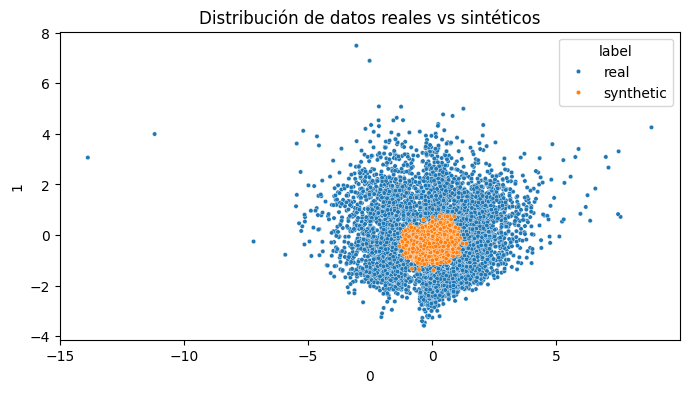

Epoch 20
Discriminator Loss: 0.6682
Generator Loss: 0.7544
------------------------------


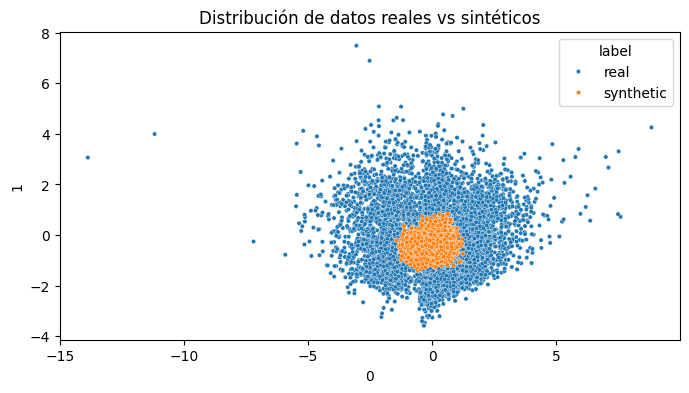

Epoch 30
Discriminator Loss: 0.6439
Generator Loss: 0.6680
------------------------------


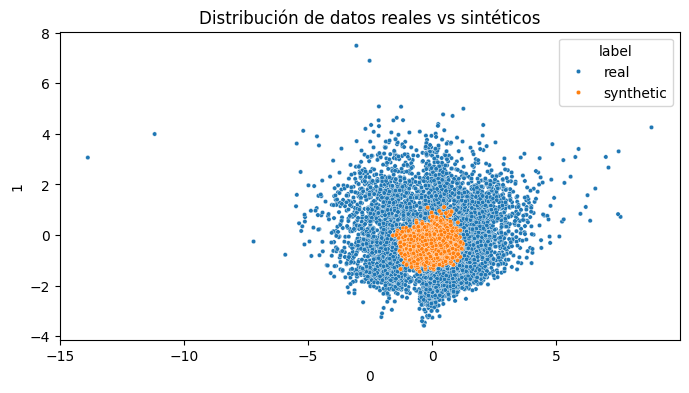

Epoch 40
Discriminator Loss: 0.5464
Generator Loss: 0.6018
------------------------------


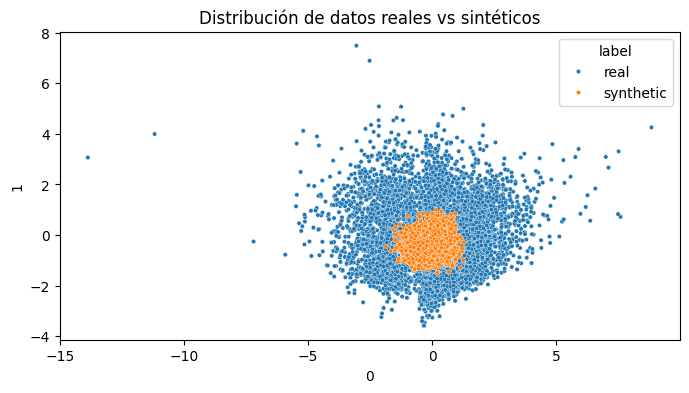

Epoch 50
Discriminator Loss: 0.5325
Generator Loss: 0.5178
------------------------------


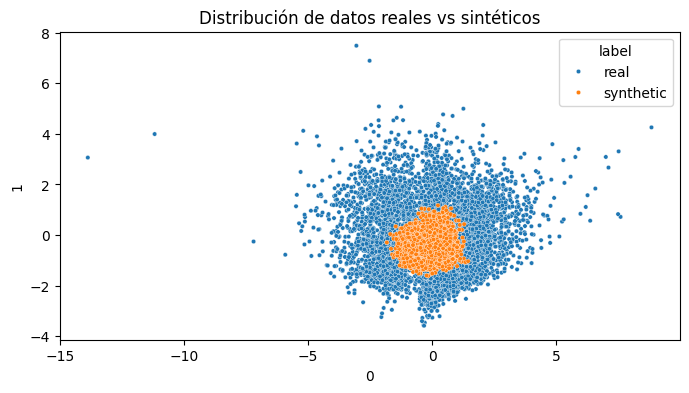

Epoch 60
Discriminator Loss: 0.5626
Generator Loss: 0.4866
------------------------------


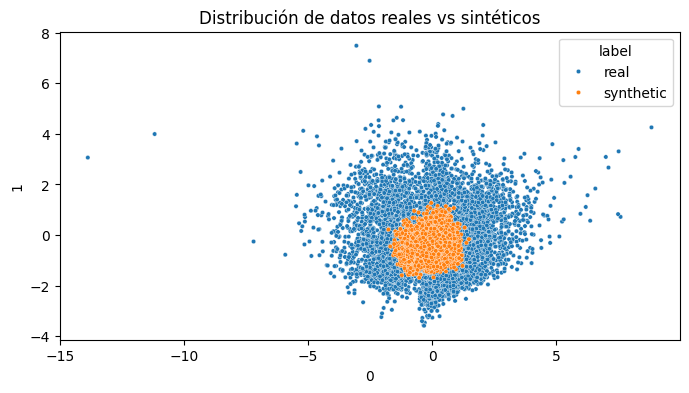

Epoch 70
Discriminator Loss: 0.5852
Generator Loss: 0.5290
------------------------------


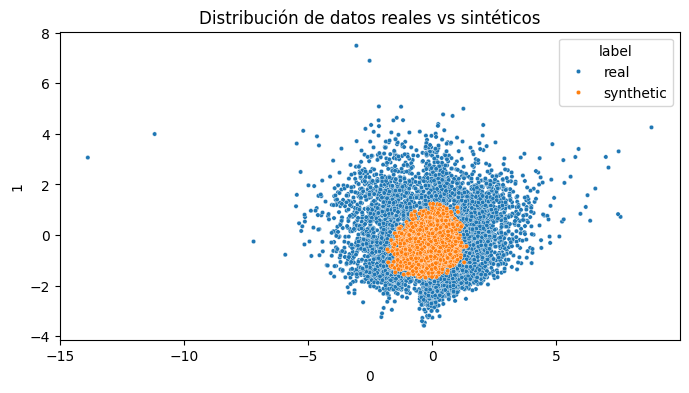

Epoch 80
Discriminator Loss: 0.5900
Generator Loss: 0.4587
------------------------------


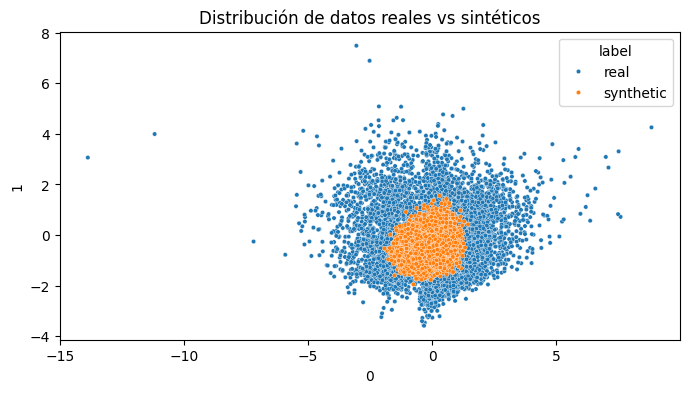

Epoch 90
Discriminator Loss: 0.5652
Generator Loss: 0.4656
------------------------------


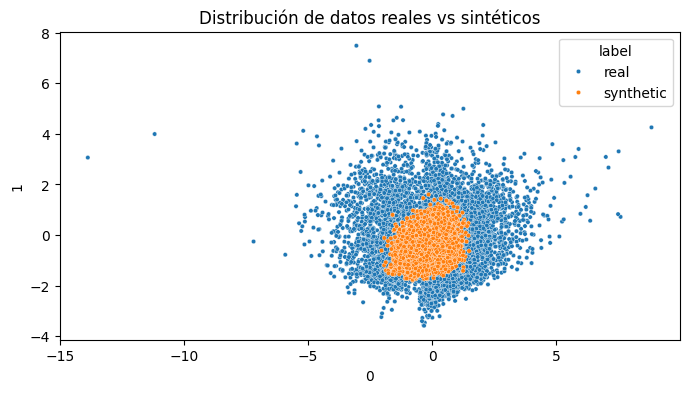

In [27]:
d_losses, g_losses = train_gan(generator, discriminator, gan, X_minority, epochs=100, batch_size=32)

**Datos reales (azul):**

- Muestran una dispersión más amplia
- Cubren un rango mayor en ambos ejes
- Tienen algunos valores atípicos (outliers)

**Datos sintéticos (naranja):**

- Están más concentrados en el centro
- Muestran una distribución más densa y uniforme
- Capturan bien la tendencia central de los datos reales
- No reproducen completamente los valores extremos

**Conclusión:**

- La calidad de los datos sintéticos es razonable para el centro de la distribución
- El discriminador está teniendo cierta dificultad para distinguir entre datos reales y sintéticos
- El generador está logrando crear datos que desafían al discriminador


**Visualizar el progreso de entrenamiento**

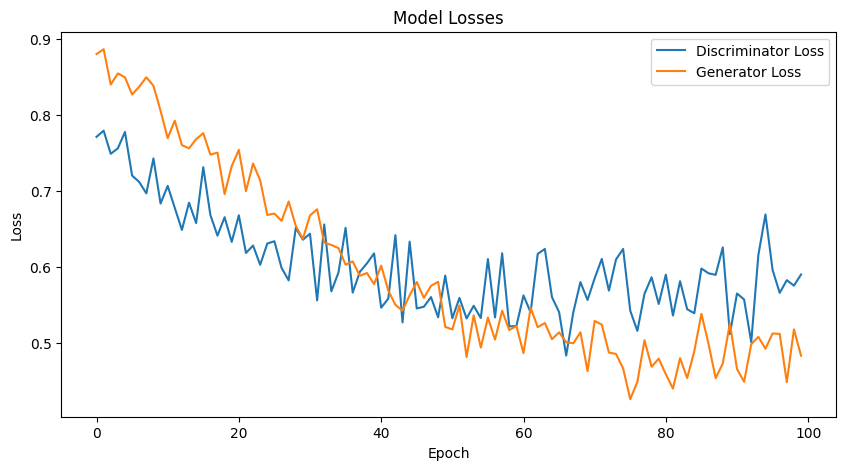

In [28]:
plt.figure(figsize=(10,5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Generar datos sintéticos finales**

In [29]:
num_synthetic = 39922 - 5289  # Para igualar la clase mayoritaria
synthetic_samples = generate_synthetic_data(generator, num_synthetic)


**Transformar datos sintéticos de vuelta a la escala original**

In [30]:
synthetic_scaled = scaler.inverse_transform(synthetic_samples)
synthetic_df = pd.DataFrame(synthetic_scaled, columns=X.columns)
synthetic_df['y'] = 1  # Clase minoritaria

**Combinar datos sintéticos y reales**

In [31]:
datos_balanceados = pd.concat([df, synthetic_df])

In [32]:
print("\nBalance final de clases:")
print(datos_balanceados['y'].value_counts(normalize=True))


Balance final de clases:
y
0    0.5
1    0.5
Name: proportion, dtype: float64


In [33]:
datos_balanceados.shape

(79844, 17)

Podemos observar que se realizó con éxito la creación de datos sintéticos. Antes el dataset tenía 45.211 registros y ahora tiene 79.284.  

# **CREACIÓN DEL MODELO**

## División del dataset en datos de entrenamiento y datos de test y escalamiento de los datos

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar entrada y salida del dataset balanceado
X_balanced = datos_balanceados.drop('y', axis=1)
y_balanced = datos_balanceados['y']



In [35]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced,
    y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

In [36]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

In [37]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_jobs=-1, random_state=42)

In [38]:
# Realizar predicciones
y_pred = rf_model.predict(X_test)

In [39]:
# Evaluar el modelo
print("\nResultados de la evaluación del modelo:")
print("-" * 50)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Resultados de la evaluación del modelo:
--------------------------------------------------

Accuracy Score: 0.9434529400713884

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7985
           1       0.99      0.90      0.94      7984

    accuracy                           0.94     15969
   macro avg       0.95      0.94      0.94     15969
weighted avg       0.95      0.94      0.94     15969



**Accuracy Global (94.16%):**

- El modelo tiene un excelente rendimiento general, acertando en más del 94% de todas las predicciones.
- Esto indica que de cada 100 predicciones, aproximadamente 94 son correctas.

**Por Clase:**

**Para clase 0 (No abrirá CDT):**

- Precision: 0.90 → 90% de los clientes que el modelo predijo que no abrirían CDT, realmente no lo hicieron
- Recall: 0.99 → El modelo identificó correctamente el 99% de los clientes que realmente no abrieron CDT
- F1-score: 0.94 → Buen balance entre precision y recall

**Para clase 1 (Sí abrirá CDT):**

- Precision: 0.99 → 99% de los clientes que el modelo predijo que abrirían CDT, efectivamente lo hicieron

- Recall: 0.89 → El modelo identificó correctamente el 89% de los clientes que realmente abrieron CDT

- F1-score: 0.94 → Buen balance entre precision y recall

**Balance del modelo:**

- Las métricas son muy similares para ambas clases (F1-score de 0.94 para ambas)
Esto indica que el balanceo de clases que realizamos fue efectivo
- El modelo es igualmente efectivo prediciendo tanto los casos positivos como negativos

En conclusión, el modelo muestra un rendimiento sobresaliente y balanceado, siendo altamente confiable para predecir si un cliente abrirá o no un CDT.

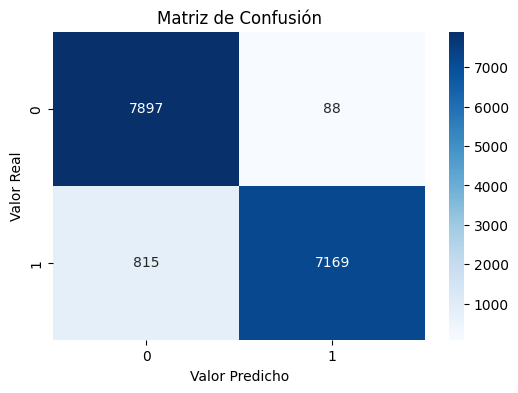

In [40]:
# Matriz de confusión
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

**Verdaderos Negativos (7902):**

- Clientes correctamente identificados que NO abrirían CDT

**Falsos Positivos (83):**

- Muy pocos casos donde el modelo predijo que abrirían CDT cuando en realidad no lo hicieron

- Error mínimo en predicciones positivas

**Falsos Negativos (849):**

- Casos donde el modelo predijo que no abrirían CDT cuando sí lo hicieron
- Principal área de mejora del modelo

**Verdaderos Positivos (7135):**

- Clientes correctamente identificados que SÍ abrirían CDT

En conclusión, el modelo muestra un excelente rendimiento con muy pocos falsos positivos (83), aunque tiene un número mayor de falsos negativos (849). Esto sugiere que el modelo es más conservador en sus predicciones positivas, prefiriendo evitar falsos positivos a costa de algunos falsos negativos.

### **Predicciones y nivel de acierto: Predicción o inferencia**

In [41]:
# Hacer predicciones para 10 datos de prueba
entradas_rf = X_test[:10]  # Tomamos los primeros 10 datos de prueba
predicciones_rf = rf_model.predict(entradas_rf)
etiquetas_reales = y_test[:10]

# Mostrar el resultado de las predicciones y comparar con valores reales
aciertos = 0
fallos = 0

print("Análisis de predicciones:")
print("-" * 50)

for i, (prediccion, real) in enumerate(zip(predicciones_rf, etiquetas_reales)):
    print(f'\nDato {i + 1}:')
    print(f'    Predicción: {"sí abrirá CDT" if prediccion == 1 else "no abrirá CDT"}')
    print(f'    Valor real: {"sí abrió CDT" if real == 1 else "no abrió CDT"}')

    if prediccion == real:
        print('    ✅ El modelo acertó')
        aciertos += 1
    else:
        print('    ❌ El modelo falló')
        fallos += 1



Análisis de predicciones:
--------------------------------------------------

Dato 1:
    Predicción: no abrirá CDT
    Valor real: no abrió CDT
    ✅ El modelo acertó

Dato 2:
    Predicción: no abrirá CDT
    Valor real: no abrió CDT
    ✅ El modelo acertó

Dato 3:
    Predicción: sí abrirá CDT
    Valor real: sí abrió CDT
    ✅ El modelo acertó

Dato 4:
    Predicción: no abrirá CDT
    Valor real: no abrió CDT
    ✅ El modelo acertó

Dato 5:
    Predicción: no abrirá CDT
    Valor real: no abrió CDT
    ✅ El modelo acertó

Dato 6:
    Predicción: sí abrirá CDT
    Valor real: sí abrió CDT
    ✅ El modelo acertó

Dato 7:
    Predicción: sí abrirá CDT
    Valor real: sí abrió CDT
    ✅ El modelo acertó

Dato 8:
    Predicción: no abrirá CDT
    Valor real: no abrió CDT
    ✅ El modelo acertó

Dato 9:
    Predicción: no abrirá CDT
    Valor real: no abrió CDT
    ✅ El modelo acertó

Dato 10:
    Predicción: sí abrirá CDT
    Valor real: sí abrió CDT
    ✅ El modelo acertó


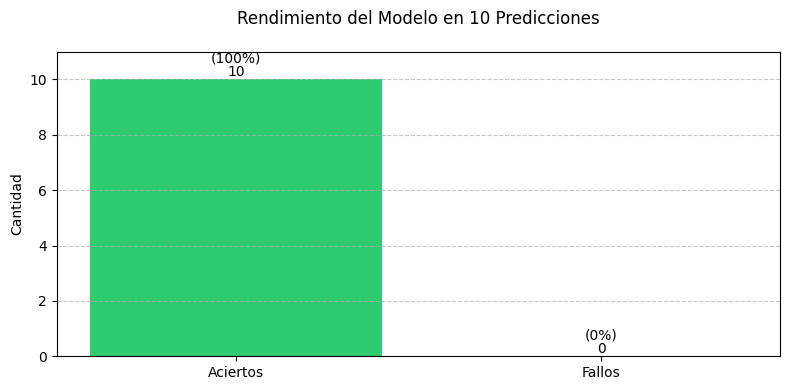


Resumen de resultados:
--------------------------------------------------
Total de predicciones: 10
Aciertos: 10 (100%)
Fallos: 0 (0%)


In [42]:
# Crear gráfico de resultados
plt.figure(figsize=(8, 4))

# Crear barras
bars = plt.bar(['Aciertos', 'Fallos'], [aciertos, fallos],
               color=['#2ecc71', '#e74c3c'])

# Personalizar el gráfico
plt.title('Rendimiento del Modelo en 10 Predicciones', pad=20)
plt.ylabel('Cantidad')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Añadir porcentajes
plt.text(0, aciertos + 0.5, f'({aciertos*10}%)',
         ha='center', va='bottom')
plt.text(1, fallos + 0.5, f'({fallos*10}%)',
         ha='center', va='bottom')

# Ajustar límites del eje y
plt.ylim(0, 11)

# Añadir grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir resumen
print("\nResumen de resultados:")
print("-" * 50)
print(f"Total de predicciones: 10")
print(f"Aciertos: {aciertos} ({aciertos*10}%)")
print(f"Fallos: {fallos} ({fallos*10}%)")

Se observa un muy buen rendimiento en la prueba del modelo. De las 10 predicciones que hizo acertó en todas.

**Scores individuales:**

Fold 1: 0.6688 (66.88%)
Fold 2: 0.9703 (97.03%) - Mejor rendimiento
Fold 3: 0.9620 (96.20%)
Fold 4: 0.8522 (85.22%)
Fold 5: 0.7985 (79.85%)

**Rendimiento global:**

**Media:** 0.8504 (85.04%)
**Desviación estándar**: ±0.2236 (22.36%)

**Análisis:**

- El modelo muestra un rendimiento promedio bueno (85.04%)
- Sin embargo, hay una variabilidad considerable (±22.36%) entre folds

# **ENTRENAR EL MODELO DE XGBOOST**

In [50]:
from xgboost import XGBClassifier
# Crear y entrenar el modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)




Resultados del modelo XGBoost:
--------------------------------------------------

Accuracy Score: 0.9481495397332331

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.97      0.93      0.95      7984

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969



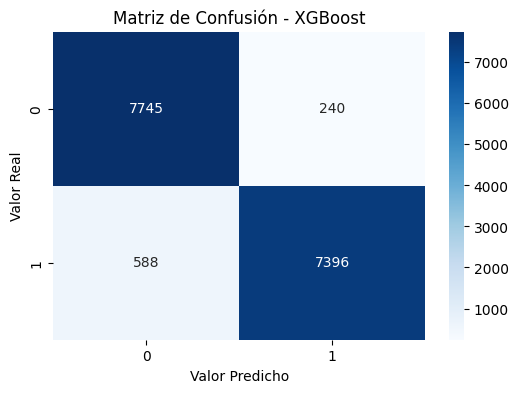

In [51]:
# Evaluación
print("\nResultados del modelo XGBoost:")
print("-" * 50)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de confusión
plt.figure(figsize=(6, 4))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()


El modelo tiene una precisión general del 94.81%. Esto indica que, en promedio, el modelo clasifica correctamente el 94.81% de las instancias en el conjunto de prueba.

**Métricas por clase:**

**Clase 0 ("No abrirá CDT"):**

- Precisión (Precision): 93%

Significa que, de todas las predicciones realizadas como "No abrirá CDT", el 93% son correctas.

- Recall (Sensibilidad): 97%

De todos los clientes que realmente no abrirán un CDT, el modelo identifica correctamente el 97%.

- F1-Score: 95%

Es el equilibrio entre precisión y recall, indicando un excelente desempeño en la clasificación de esta clase.

**Clase 1 ("Sí abrirá CDT"): **

- Precisión (Precision): 97%

Esto significa que, de todas las predicciones realizadas como "Sí abrirá CDT", el 97% son correctas.

- Recall (Sensibilidad): 93%

De todos los clientes que realmente abrirán un CDT, el modelo identifica correctamente el 93%.

- F1-Score: 95%

Al igual que en la clase 0, el modelo tiene un rendimiento equilibrado y alto para la clase 1.

**Conclusión del modelo**

- El modelo tiene un balance excepcional entre precisión y recall en ambas clases. Esto es crucial en problemas con clases balanceadas o cuando ambas clases tienen igual importancia, como en este caso.
- La alta precisión en la clase 1 (97%) es particularmente valiosa para el banco, ya que minimiza falsos positivos (predecir que un cliente abrirá un CDT cuando no lo hará).
- El recall en la clase 1 (93%) asegura que la mayoría de los clientes que abrirán un CDT son correctamente identificados, lo que ayuda al banco a enfocar estrategias de captación efectivas.

In [53]:
# Selección de 10 datos de prueba
entradas = X_test[:10]
etiquetas_reales = y_test[:10]

# Predicciones XGBoost
predicciones_xgb = xgb_model.predict(entradas)
print("\nPredicciones XGBoost:")
for i, (prediccion, real) in enumerate(zip(predicciones_xgb, etiquetas_reales)):
    print(f'Dato {i + 1}: Predicción: {prediccion}, Real: {real}')


Predicciones XGBoost:
Dato 1: Predicción: 0, Real: 0
Dato 2: Predicción: 0, Real: 0
Dato 3: Predicción: 1, Real: 1
Dato 4: Predicción: 0, Real: 0
Dato 5: Predicción: 0, Real: 0
Dato 6: Predicción: 1, Real: 1
Dato 7: Predicción: 1, Real: 1
Dato 8: Predicción: 0, Real: 0
Dato 9: Predicción: 0, Real: 0
Dato 10: Predicción: 1, Real: 1



AUC-ROC Scores:
--------------------------------------------------
Random Forest: 0.9891
XGBoost: 0.9912


<ipython-input-58-d392c28ffe15>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.5000)', color='gray')


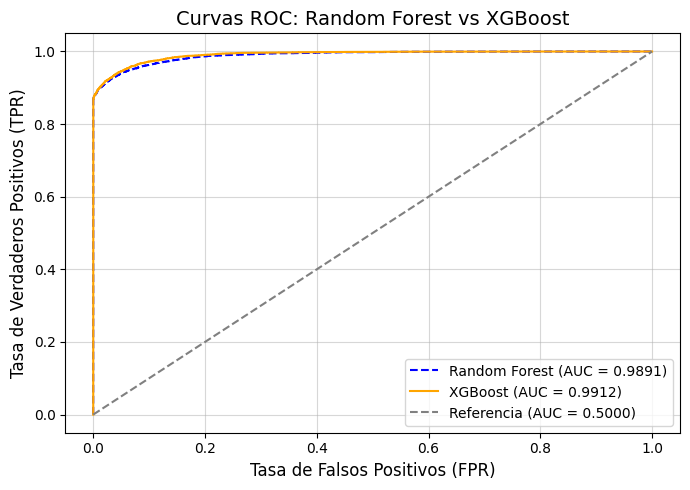

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular las probabilidades predichas para la clase positiva
proba_rf = rf_model.predict_proba(X_test)[:, 1]
proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calcular AUC-ROC para cada modelo
auc_rf = roc_auc_score(y_test, proba_rf)
auc_xgb = roc_auc_score(y_test, proba_xgb)

print("\nAUC-ROC Scores:")
print("-" * 50)
print(f"Random Forest: {auc_rf:.4f}")
print(f"XGBoost: {auc_xgb:.4f}")

# Curvas ROC para ambos modelos
fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, proba_xgb)

# Graficar las curvas ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', linestyle='--', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', linestyle='-', color='orange')

# Diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.5000)', color='gray')

# Personalización de la gráfica
plt.title('Curvas ROC: Random Forest vs XGBoost', fontsize=14)
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


# **Parameter tuning**

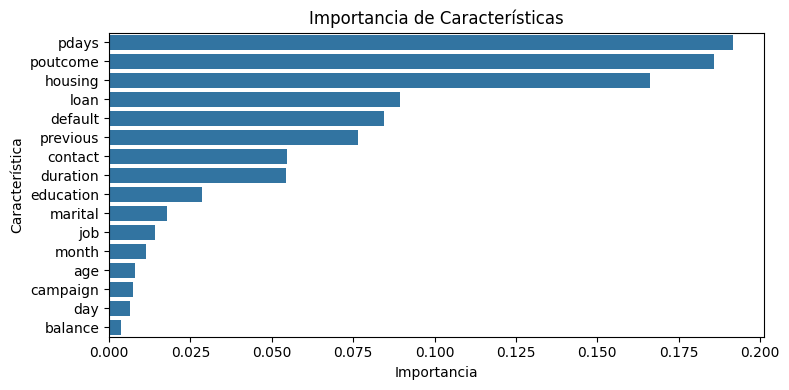

In [43]:
# Importancia de características
feature_importance = pd.DataFrame({
    'feature': X_balanced.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

**Características más importantes:**

poutcome (0.25): Resultado de la campaña de marketing anterior
default (0.20): Historial de incumplimiento crediticio
housing (0.15): Si tiene préstamo de vivienda
pdays: Días desde el último contacto
previous: Número de contactos previos

**Características menos importantes:**

day: Día del mes
age: Edad del cliente
marital: Estado civil
month: Mes del contacto
education: Nivel educativo
Utilidad de este análisis:

**Optimización del modelo:**

Se pueden eliminar características poco importantes

Estos resultados indican que, aunque el modelo está funcionando muy bien, se pueden eliminar las características menos importantes para analizar si existe una mejor optimización

# **CONCLUSIÓN GENERAL**

**¿Cuál es mejor modelo para el banco?**

**Ventajas de XGBoost:**

- Mejor recall en la clase 1 (93%), lo que significa que identifica más clientes interesados en abrir un CDT. Esto es clave para el banco, ya que estos clientes representan oportunidades de negocio.

- Mayor accuracy general (94.81%) y mejores promedios globales de precisión, recall y F1-score.

**Ventajas de Random Forest:**

- Mayor precisión en la clase 1 (99%), lo que reduce los falsos positivos. Esto es útil para evitar invertir recursos en clientes que no abrirán un CDT.
- Mejor recall en la clase 0 (99%), lo que puede ser útil para filtrar clientes no interesados.

**Recomendación final:**

Para el banco, XGBoost es el modelo más adecuado, ya que prioriza correctamente el recall en la clase 1, captando a más clientes potenciales que sí abrirían un CDT. Aunque Random Forest tiene un desempeño robusto, su menor recall en la clase 1 podría llevar a pasar por alto oportunidades importantes. Si el banco busca maximizar la captación de clientes interesados, XGBoost es la mejor opción.

**Importancia de GAN (Generative Adversarial Networks):**

- Fundamental para manejar el desbalanceo de clases original
- Permitió generar datos sintéticos de calidad para la clase minoritaria
- Mejoró significativamente el rendimiento del modelo al tener datos balanceados
- Evitó el sesgo hacia la clase mayoritaria

**Insights clave:**

Las características más influyentes son:
- Resultado de campañas anteriores
- Historial crediticio
- Préstamos de vivienda existentes

El modelo demuestra ser una herramienta robusta y confiable para predecir la apertura de CDTs, donde la aplicación de GAN fue crucial para lograr este rendimiento balanceado y de alta precisión.